# **Análisis Exploratio de Datos**

#### **Conociendo mejor el conjunto de datos y respondiendo preguntas.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

**Cargar el conjunto de datos**

In [2]:
df_vehicle_price = pd.read_csv('../data/processed/vehicle_price.csv')
df_vehicle_price.head(5)

,Unnamed: 0,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,...,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,...,Brown,5,No Accident,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,...,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,...,Beige,5,No Accident,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,...,Gray,3,No Accident,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,...,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


**Identificar cuales columnas creemos que pueden tener un impacto en el valor del precio del vehiculo**

In [3]:
df_vehicle_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1000000 non-null  int64  
 1   make              1000000 non-null  object 
 2   model             1000000 non-null  object 
 3   year              1000000 non-null  int64  
 4   mileage           1000000 non-null  int64  
 5   engine_hp         1000000 non-null  int64  
 6   transmission      1000000 non-null  object 
 7   fuel_type         1000000 non-null  object 
 8   drivetrain        1000000 non-null  object 
 9   body_type         1000000 non-null  object 
 10  exterior_color    1000000 non-null  object 
 11  interior_color    1000000 non-null  object 
 12  owner_count       1000000 non-null  int64  
 13  accident_history  1000000 non-null  object 
 14  seller_type       1000000 non-null  object 
 15  condition         1000000 non-null  object 
 16  t

Las columnas que pueden llegar a influir en el precio del vehiculo son las siguientes:
- make o model
- year
- mileage
- fuel_type
- ower_count
- condition

Para confirmar nuestra intuisión realizaremos una **matriz de correlación** para confirmar si es verdad o no.

**Matriz de Correlación**

In [4]:
# Eliminar colummna inecesaria
df_vehicle_price = df_vehicle_price.drop('Unnamed: 0', axis=1)

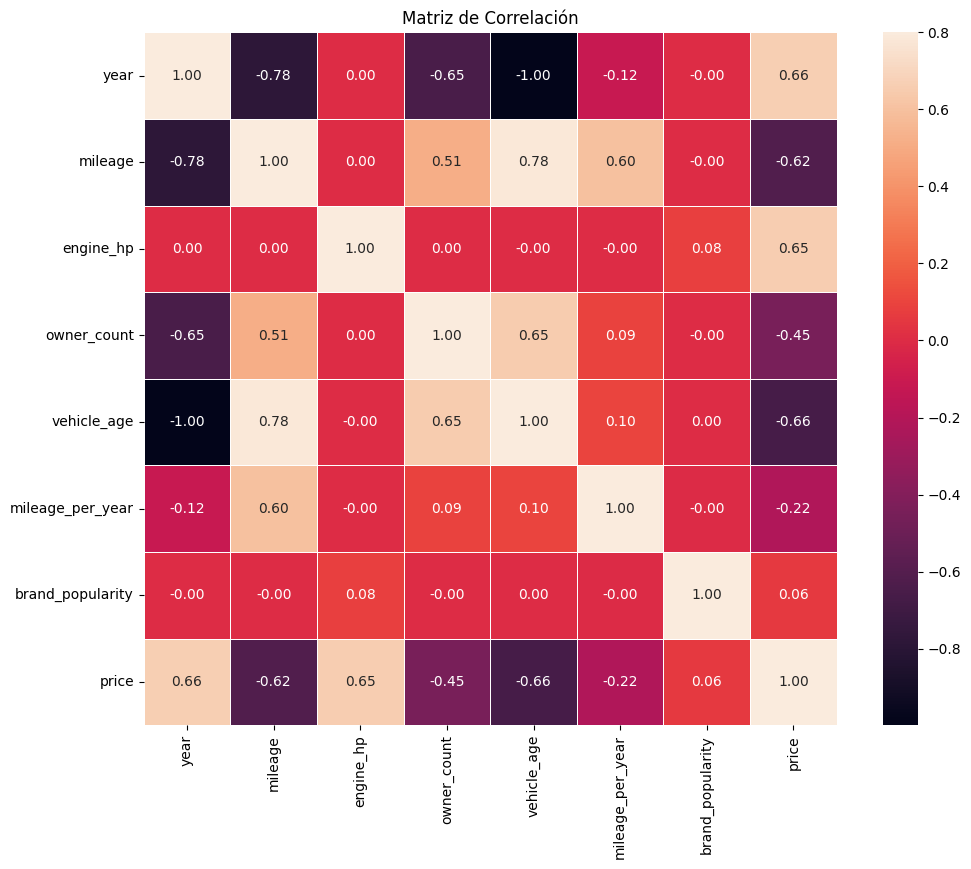

In [5]:
corrmat = df_vehicle_price.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

Estas correlaciones aplican solo a las columnas númericas por lo que las columnas categoricas estan descartadas, pero para evitrar que se nos pase una correlación con las variables categoricas realizaremos una matriz de correlación que incluya todas las columnas.

In [6]:
# Realizamos una copia al conjunto de datos original
df_vehicle_price_copi = df_vehicle_price.copy()

In [7]:
# Mapeo para la columna Ordinal
orden_condicion = {
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

# Aplicar el mapeo al DataFrame
df_vehicle_price_copi['condition_encoded'] = df_vehicle_price_copi['condition'].map(orden_condicion)

In [8]:
# Columnas para One-Hot Encoding
cols_to_onehot = [
    'transmission', 'fuel_type', 'drivetrain', 'body_type', 
    'exterior_color', 'interior_color', 'accident_history', 
    'seller_type', 'trim'
]

# Crear las nuevas columnas binarias
df_dummies = pd.get_dummies(df_vehicle_price_copi[cols_to_onehot], drop_first=True)

# Eliminar las columnas originales que ya fueron codificadas
df_vehicle_price_copi = df_vehicle_price_copi.drop(columns=cols_to_onehot)

# Unir las nuevas columnas codificadas al DataFrame
df_final = pd.concat([df_vehicle_price_copi, df_dummies], axis=1)

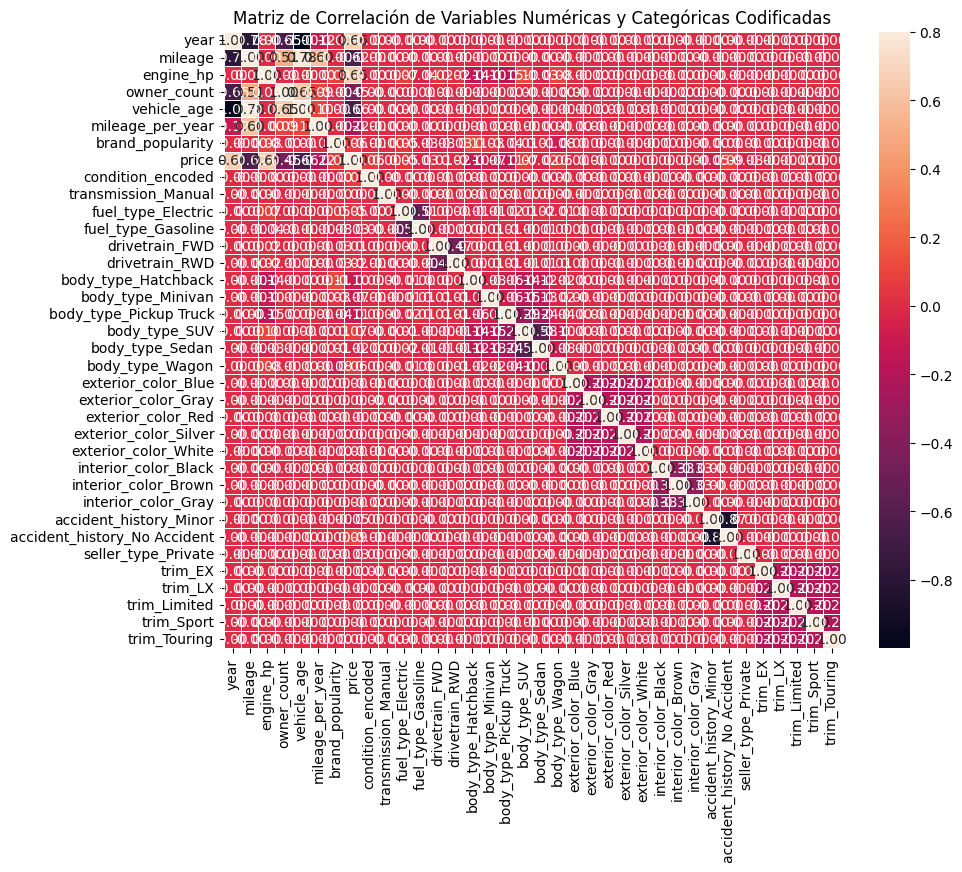

In [9]:
corrmat = df_final.corr(numeric_only=True)

# Visualizar el mapa de calor
f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Categóricas Codificadas')
plt.show()

**Filtramos solo las correlaciones más relevantes**

In [10]:
# 1. Extraer las correlaciones de la variable 'price'
price_correlations = corrmat['price'].sort_values(ascending=False)

# 2. Imprimir las correlaciones para revisar los valores
print("Correlaciones con el Precio:\n", price_correlations)

# 3. Determinar un umbral de correlación (ej. |r| > 0.1)
umbral = 0.1 
relevantes = price_correlations[abs(price_correlations) > umbral].index.tolist()

# print("\nVariables con Correlación Absoluta > {}: \n".format(umbral), relevantes)

Correlaciones con el Precio:
 price                           1.000000
year                            0.664730
engine_hp                       0.653339
accident_history_No Accident    0.085387
body_type_SUV                   0.073637
condition_encoded               0.062342
body_type_Wagon                 0.056530
brand_popularity                0.055940
fuel_type_Electric              0.049358
drivetrain_RWD                  0.016100
drivetrain_FWD                  0.014426
interior_color_Black            0.002057
trim_Touring                    0.001493
transmission_Manual             0.001389
exterior_color_White            0.000735
interior_color_Brown            0.000735
exterior_color_Gray             0.000618
interior_color_Gray             0.000573
exterior_color_Blue             0.000188
exterior_color_Silver           0.000187
trim_Sport                      0.000078
exterior_color_Red             -0.000187
trim_LX                        -0.000539
trim_Limited               

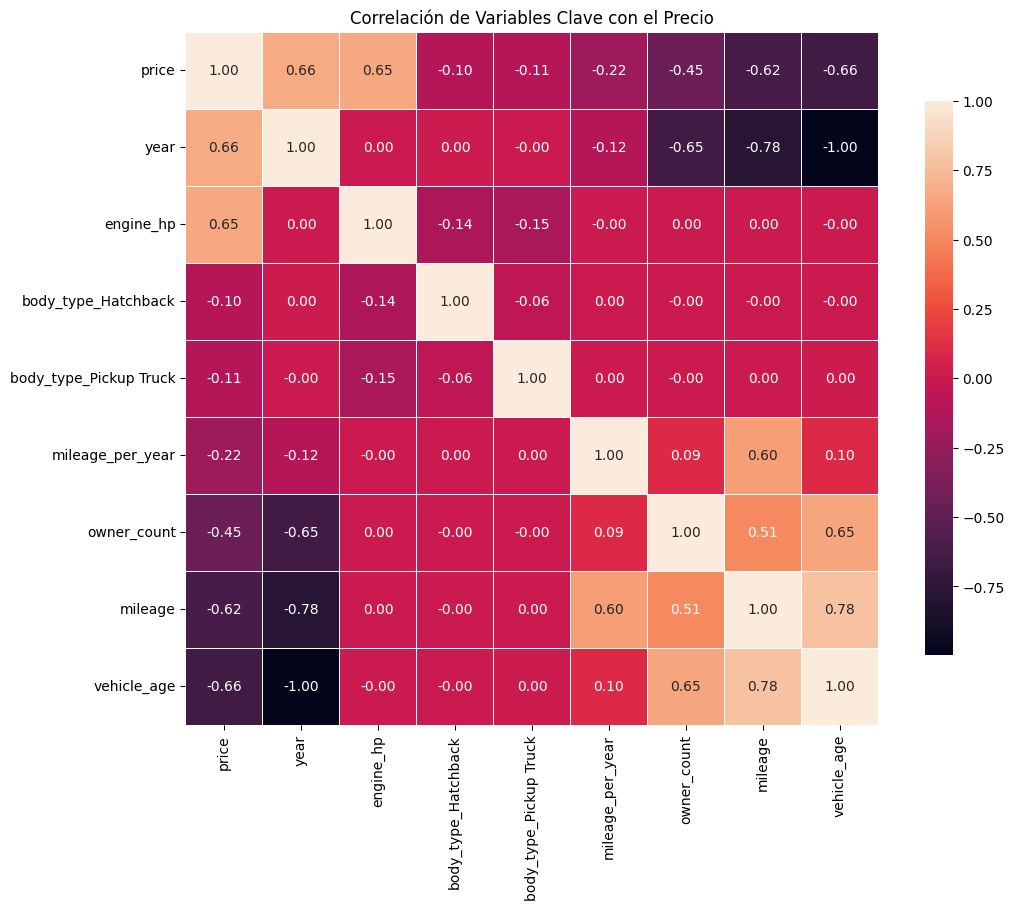

In [11]:
# Seleccionar las columnas relevantes del DataFrame original
df_reducido = df_final[relevantes]

# Calcular la nueva matriz de correlación solo con las variables seleccionadas
corrmat_reducida = df_reducido.corr()

# Visualizar el nuevo mapa de calor
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat_reducida, 
            annot=True, # Mostrar los valores de correlación
            fmt=".2f",  # Formato con dos decimales
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Correlación de Variables Clave con el Precio')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

En ambos casos obtuvimos las mismas relación por lo que apartir de estas correlaciones que se obtuvieron centraremos nuestro analisis.

**Ahora respondamos algunas preguntas para conocer más sobre el conjunto de datos**

##### **Precio Vs Año**

¿Cuál es el precio promedio de los vehículos para cada año de fabricación presente en el conjunto de datos?

In [12]:
# Agrupar por año de fabricación
precio_vehiculos_por_annio = df_vehicle_price.groupby(['year'])['price'].mean()
print(f'{"Año":<7}  {"Precio Promedio"}')
for i,j in precio_vehiculos_por_annio.items():
    print(f'{i:<10}  ${j:<10.2f}')

Año      Precio Promedio
2000        $2905.55   
2001        $1884.48   
2002        $2018.76   
2003        $1979.12   
2004        $2281.11   
2005        $2726.74   
2006        $3086.62   
2007        $3550.47   
2008        $4157.68   
2009        $4923.88   
2010        $5896.97   
2011        $6996.29   
2012        $8328.50   
2013        $9867.73   
2014        $11602.28  
2015        $13687.58  
2016        $15807.08  
2017        $18080.29  
2018        $20554.71  
2019        $23123.00  
2020        $25946.04  
2021        $28731.71  
2022        $31898.80  
2023        $35301.98  
2024        $39009.84  
2025        $39425.81  


¿Cómo se distribuyen los precios de los vehículos más nuevos (por ejemplo, últimos 5 años) en comparación con los más antiguos?

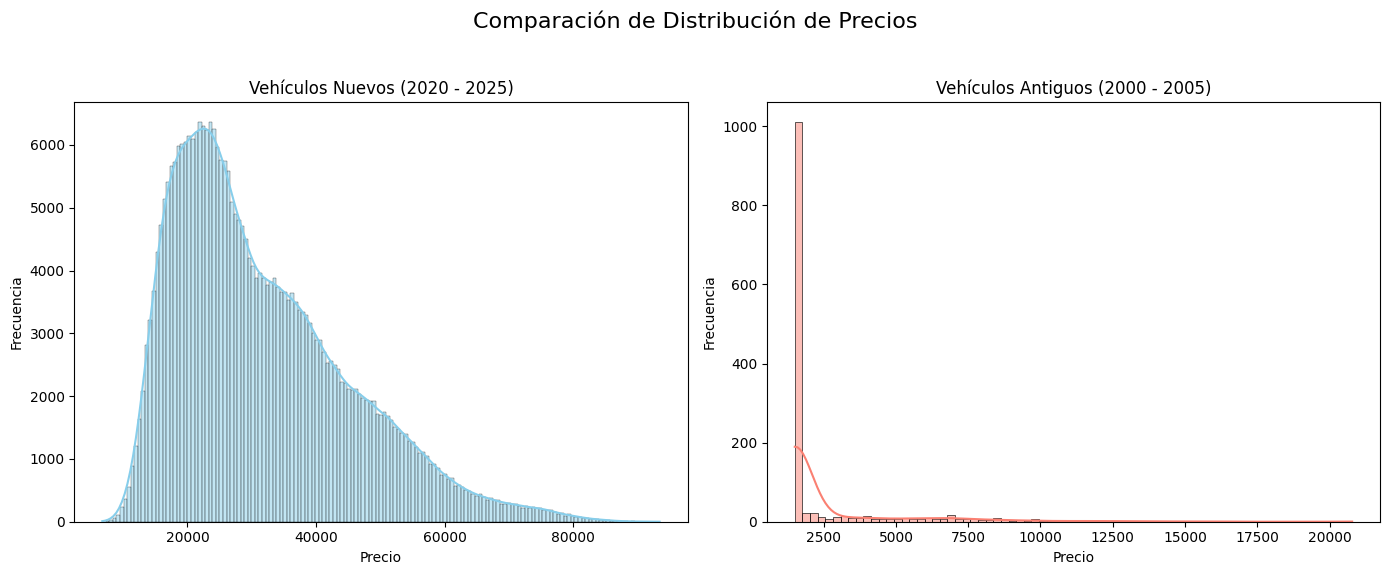

In [13]:
# Obtner los precio de los automoviles de los 5 años más nuevo y 5 más antiguos
precio_vehiculos_mas_nuevos = df_vehicle_price[(df_vehicle_price['year'] >= 2020) & (df_vehicle_price['year'] <= 2025)]

precio_vehiculos_mas_antiguos = df_vehicle_price[(df_vehicle_price['year'] >= 2000) & (df_vehicle_price['year'] <= 2005)]

# Creación de los gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.histplot(
    precio_vehiculos_mas_nuevos['price'], 
    kde=True, 
    ax=axes[0], 
    color='skyblue'
) 
axes[0].set_title('Vehículos Nuevos (2020 - 2025)')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

sns.histplot(
    precio_vehiculos_mas_antiguos['price'], 
    kde=True, 
    ax=axes[1], 
    color='salmon'
) 
axes[1].set_title('Vehículos Antiguos (2000 - 2005)')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

# Ajustar el espaciado y mostrar la figura
fig.suptitle('Comparación de Distribución de Precios', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta automáticamente el espacio, dejando espacio para el supertítulo
plt.show()

* Ambos gráficos muestran que el precio de los vehículos sigue una distribución sesgada a la derecha (positiva). Esto significa que la mayoría de las transacciones ocurren en los precios más bajos, y una minoría de vehículos de lujo o especiales eleva el precio promedio, extendiendo la distribución hacia la derecha.

¿Existe un punto a partir del cual el aumento en el año de fabricación (vehículo más nuevo) ya no se traduce en un incremento significativo en el precio?

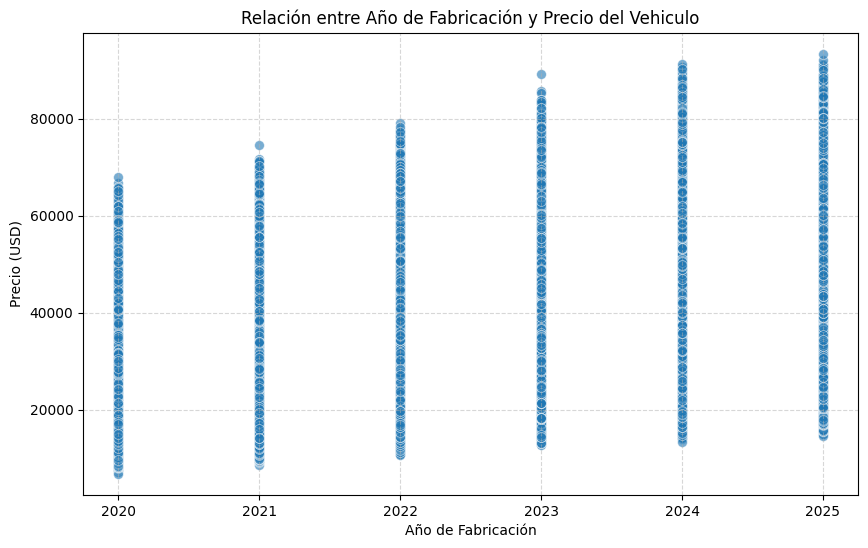

In [14]:
# Creación del gráfico 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year',y='price',data=precio_vehiculos_mas_nuevos,alpha=0.6,s=50)
plt.title('Relación entre Año de Fabricación y Precio del Vehiculo')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio (USD)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

El punto de inflexión o saturación para el precio máximo del vehículo ocurre a partir del año de fabricación 2023. Esto significa que:
* Un modelo 2025 no tiene un techo de precio significativamente mayor que un modelo 2023.
* El valor marginal de ser un año más nuevo es cercano a cero para el segmento de vehículos de precio más alto (lujo o gama alta) a partir de 2023.

##### **Precio vs. Potencia del Motor**

¿Cuál es el rango de potencia del motor más común para los vehículos con un precio superior al percentil 75?

In [15]:
# Obtener el percentil 75 
percentil_75 = df_vehicle_price['price'].quantile(0.75)
print(f'Percentil 75: ${percentil_75:.2f}')


vehicle_potencia_motor = df_vehicle_price[df_vehicle_price['price'] >= percentil_75]
rango_potencia_motor_maximo = vehicle_potencia_motor['engine_hp'].max()
rango_potencia_motor_minimo = vehicle_potencia_motor['engine_hp'].min()
print(f'Potencia del motor de Vehículos con un Precio Superior al percentil 75 (${percentil_75:.2f})')
print(f'engine_hp(Maxima): {rango_potencia_motor_maximo} \nengine_hp(Minima): {rango_potencia_motor_minimo}')

Percentil 75: $27601.40
Potencia del motor de Vehículos con un Precio Superior al percentil 75 ($27601.40)
engine_hp(Maxima): 576 
engine_hp(Minima): 90


* El rango de potencia del motor más común de vehículo con un precio superior al percentil 75 va de ``90`` a ``576`` hp .

¿Cómo varía el precio promedio (price) de los vehículos al agruparlos en cuartiles (Q1, Q2, Q3, Q4) basados en la potencia de su motor (engine_hp)?

In [16]:
percentiles_engine_hp = df_vehicle_price['engine_hp'].quantile([0.25,0.50,0.75])
print(f'Percentiles Potencia de Motor\n{percentiles_engine_hp}')

# Agrupar
precio_engine_hp_bajo = df_vehicle_price[df_vehicle_price['engine_hp'] <= 162]
promedio_precio_bajo = precio_engine_hp_bajo['price'].mean()

precio_engine_hp_bajo_medio = df_vehicle_price[(df_vehicle_price['engine_hp'] > 162) & (df_vehicle_price['engine_hp'] <= 215)]
promedio_precio_bajo_medio = precio_engine_hp_bajo_medio['price'].mean()

precio_engine_hp_medio_alto = df_vehicle_price[(df_vehicle_price['engine_hp'] > 215) & (df_vehicle_price['engine_hp'] <= 300)]
promedio_precio_medio_alto = precio_engine_hp_medio_alto['price'].mean()

precio_engine_hp_alto = df_vehicle_price[(df_vehicle_price['engine_hp'] > 300)]
promedio_precio_alto = precio_engine_hp_alto['price'].mean()

print(f'''\nPrecio Promedio de los Vehículos
{'Bajo(< 162):':24} ${promedio_precio_bajo:<10.2f}
Bajo - Medio(162 < 215): ${promedio_precio_bajo_medio:<10.2f}
{'Medio - Alto(215 < 300):':<10} ${promedio_precio_medio_alto:<10.2f}
{'Alto(> 300):':<24} ${promedio_precio_alto:<10.2f}''')

Percentiles Potencia de Motor
0.25    162.0
0.50    215.0
0.75    300.0
Name: engine_hp, dtype: float64

Precio Promedio de los Vehículos
Bajo(< 162):             $11407.64  
Bajo - Medio(162 < 215): $14809.71  
Medio - Alto(215 < 300): $22123.70  
Alto(> 300):             $33249.04  


* El factor "potencia del motor" no solo influye en el precio, sino que su impacto se acelera a medida que la potencia aumenta. El costo marginal de añadir caballos de fuerza es significativamente mayor en el segmento superior que en el segmento inferior.

¿Qué tipo de carrocería (body_type) o marca (make) tiene la mayor correlación entre engine_hp y price?

In [17]:
# Agrupamos los datos 
correlacion_make = df_vehicle_price.groupby('make')[['engine_hp','price']].corr()

# Extraer la correlación especifica entre engine_hp y price
correlacion_final = correlacion_make.loc[(slice(None), 'price'), 'engine_hp'].droplevel(1)

# Encontrar el valor máximo usando el valor absoluto
tipo_maximo = correlacion_final.abs().idxmax()
valor_maximo = correlacion_final.loc[tipo_maximo]

print(f'El tipo de Marca con la correlación es: {tipo_maximo}')
print(f'Valor de la correlación: {valor_maximo:3f}')

El tipo de Marca con la correlación es: Kia
Valor de la correlación: 0.081982


##### **Antigüedad del Vehículo vs. Kilometraje**

¿Cómo se comporta la tasa de kilometraje por año (mileage_per_year) en función de la antigüedad del vehículo? ¿Los vehículos más antiguos tienden a tener una mileage_per_year menor o mayor?

Promedio de Kilometraje de Vehículos (Global): 13732.37
    vehicle_age  mileage_per_year
0             1       8656.013470
1             2      15070.595873
2             3      15062.714627
3             4      14976.501286
4             5      15013.808542
5             6      15018.725426
6             7      15014.659264
7             8      15008.883117
8             9      15034.154694
9            10      14988.583228
10           11      15007.386509
11           12      14897.748935
12           13      14878.456455
13           14      14724.228458
14           15      14548.643855
15           16      14236.920030
16           17      13970.115932
17           18      13558.726075
18           19      13422.370839
19           20      12997.741780
20           21      12613.837727
21           22      12260.687879
22           23      11721.581236
23           24      10218.945312
24           25      10407.295000


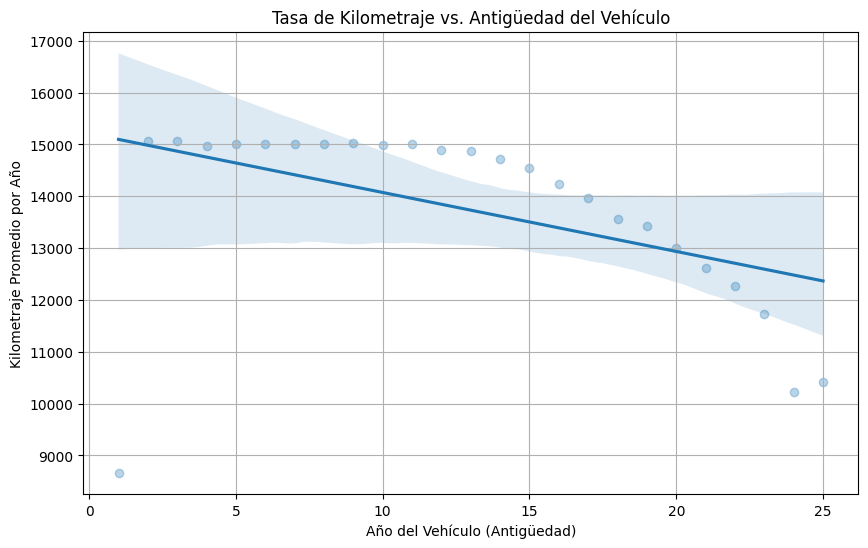

In [18]:
tasa_kilometraje_por_antiguedad = df_vehicle_price.groupby('vehicle_age')['mileage_per_year'].mean().reset_index()

promedio_global = tasa_kilometraje_por_antiguedad['mileage_per_year'].mean()

print(f'Promedio de Kilometraje de Vehículos (Global): {promedio_global:.2f}')
print(tasa_kilometraje_por_antiguedad)


plt.figure(figsize=(10, 6))
sns.regplot(x='vehicle_age', y='mileage_per_year', data=tasa_kilometraje_por_antiguedad, scatter_kws={'alpha':0.3})
plt.title('Tasa de Kilometraje vs. Antigüedad del Vehículo')
plt.xlabel('Año del Vehículo (Antigüedad)')
plt.ylabel('Kilometraje Promedio por Año')

plt.grid(True)
plt.show()

La gráfica muestra una tendencia descendente de mileage_per_year conforme aumenta la antigüedad del vehículo.
Esto significa que:

* Vehículos más nuevos (baja vehicle_age) → tienen un kilometraje anual más alto.
* Vehículos más antiguos (alta vehicle_age) → tienen un kilometraje anual más bajo.

En otras palabras, los vehículos más antiguos tienden a ser usados menos cada año.

Para cada categoría de condición (condition), ¿cuál es la mileage promedio de los vehículos con más de 10 años de antigüedad?

In [19]:
vehiculos_mas_10_antiguedad = df_vehicle_price[df_vehicle_price['vehicle_age'] >= 10]
condicion_mileage_promedio = vehiculos_mas_10_antiguedad.groupby('condition')['mileage'].mean()
condicion_mileage_promedio = condicion_mileage_promedio.sort_values(ascending=False)

print(f'{'Condición':<12}{'Promedio de kilometro':>15}')
for condicion, promedio_per_year in condicion_mileage_promedio.items():
    print(f'{condicion:<18}{promedio_per_year:>15.2f}')

Condición   Promedio de kilometro
Good                    178991.92
Fair                    178716.14
Excellent               178491.63


* Entre los vehículos con más de 10 años de antigüedad, el kilometraje promedio es similar entre las distintas condiciones ("Excellent", "Good", "Fair"). Esto sugiere que la condición del vehículo no depende únicamente del kilometraje acumulado, sino también del mantenimiento y el uso que ha recibido.

¿Qué tipo de tracción (drivetrain) o tipo de combustible (fuel_type) muestra la mileage más alta para un vehículo con una antigüedad determinada?

In [20]:
# Determinar vehiculos con una antiguedad determinada
antiguedad = 10 # Modificar la antiguedad a voluntad
vehiculos_antiguedad_x = df_vehicle_price[df_vehicle_price['vehicle_age'] == antiguedad]

tipo_traccion = vehiculos_antiguedad_x.groupby('drivetrain')['mileage'].mean()
tipo_combustible = vehiculos_antiguedad_x.groupby('fuel_type')['mileage'].mean()

tipo_traccion = tipo_traccion.sort_values(ascending=False)
tipo_combustible = tipo_combustible.sort_values(ascending=False)

print(f'{'Tipo de Tracción':<10}{'Kilometraje Promedio':>25}')
for trac, kilometraje in tipo_traccion.items():
    print(f'{trac:<10}{kilometraje:>31.2f}')

print(f'{'Tipo de Combustible':<10}{'Kilometraje Promedio':>22}')
for combus, kilometraje in tipo_combustible.items():
    print(f'{combus:<10}{kilometraje:>31.2f}')


Tipo de Tracción     Kilometraje Promedio
FWD                             150044.65
AWD                             149838.75
RWD                             149779.97
Tipo de Combustible  Kilometraje Promedio
Electric                        150099.06
Diesel                          149860.65
Gasoline                        149667.40


* Para vehículos con 10 años de antigüedad, el tipo de tracción FWD presenta el mayor kilometraje promedio acumulado, seguido por AWD y RWD. En cuanto al tipo de combustible, los vehículos eléctricos muestran la mileage promedio más alta, seguidos por los vehículos diésel y gasolina.

##### **Antigüedad del Vehículo vs. Conteo de Dueños**

¿Cuál es la antigüedad promedio de los vehículos que han tenido tres o más dueños?

In [21]:
antiguedad_conteno_duennios = df_vehicle_price[df_vehicle_price['owner_count'] >= 3]
promedio_antiguedad = antiguedad_conteno_duennios['vehicle_age'].mean()

print(f'La antiguedad promedio de vehiculos con 3 o más dueños es de: {promedio_antiguedad:.2f} años')

La antiguedad promedio de vehiculos con 3 o más dueños es de: 9.01 años


* Los vehículos que han pasado por 3 o más dueños tienen una antigüedad promedio de ≈ 9 años. Esto tiene sentido: mientras más años tenga un vehículo, más probable es que haya cambiado de propietario varias veces.

¿Cómo se distribuye la antigüedad del vehículo en los vehículos con un owner_count de 1 (un solo dueño) en comparación con aquellos con un owner_count alto?

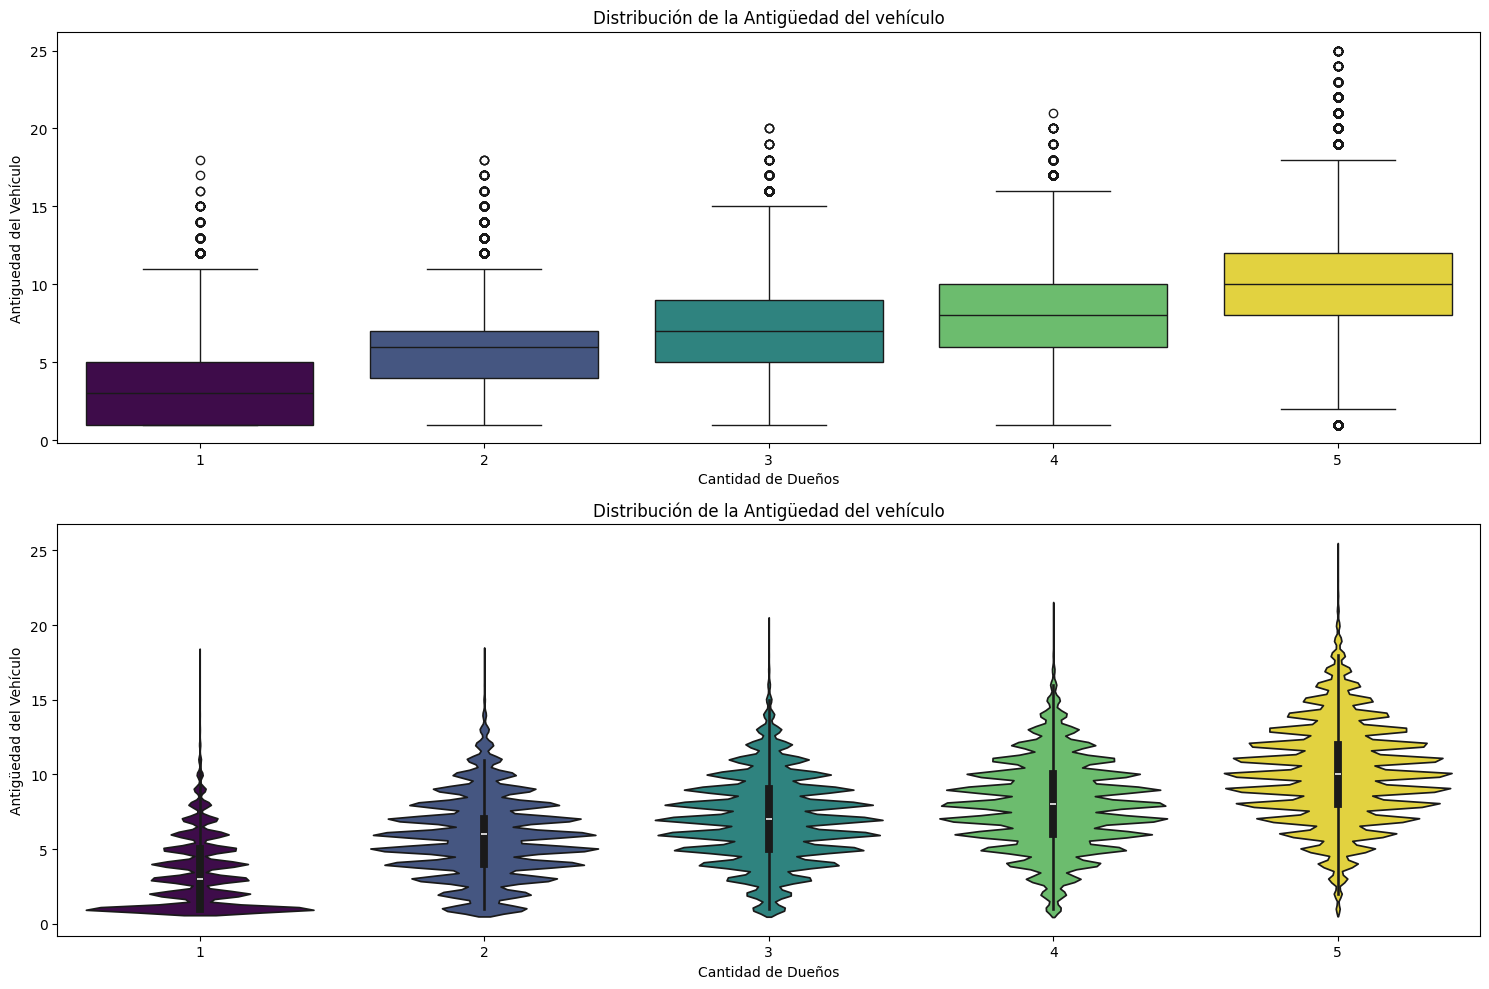

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.boxplot(y='vehicle_age', x='owner_count', data=df_vehicle_price, hue='owner_count', palette='viridis', legend=False)
plt.title('Distribución de la Antigüedad del vehículo')
plt.xlabel('Cantidad de Dueños')
plt.ylabel('Antiguedad del Vehículo')

plt.subplot(2,1,2)
sns.violinplot(x='owner_count', y='vehicle_age', data=df_vehicle_price, hue='owner_count',palette='viridis', legend=False)
plt.title("Distribución de la Antigüedad del vehículo")
plt.xlabel("Cantidad de Dueños")
plt.ylabel("Antigüedad del Vehículo")

plt.tight_layout()
plt.show()

* Los vehículos con un solo dueño tienden a ser más nuevos y con menor variación en su antigüedad. Conforme aumenta el número de propietarios, la antigüedad promedio del vehículo incrementa y la distribución se vuelve más amplia. Esto sugiere que los vehículos con mayor cantidad de dueños tienden a haber sido utilizados por más tiempo y presentan historiales más variados.

##### **Kilometraje por Año vs. Kilometraje Total**

¿Cuál es la mileage_per_year promedio de los vehículos clasificados en el 25% superior de mileage total?

In [23]:
percentil_75 = df_vehicle_price['mileage'].quantile(0.75)
vehiculos_top_25 = df_vehicle_price[df_vehicle_price['mileage'] >= percentil_75]
promedio_mileage_per_year_top25 = vehiculos_top_25['mileage_per_year'].mean()

print(f'Kilometraje total (percentil 75): {percentil_75:.2f}')
print(f'Promedio de mileage_per_year del 25% superior: {promedio_mileage_per_year_top25:.2f}')

Kilometraje total (percentil 75): 157865.00
Promedio de mileage_per_year del 25% superior: 19098.50


* Los vehículos que se encuentran en el 25% superior de kilometraje total muestran una tasa de kilometraje anual mayor. Esto indica que fueron utilizados de manera más intensiva a lo largo de su vida útil, probablemente debido a desplazamientos frecuentes, viajes largos o uso continuo.

##### **Conteo de Dueños vs. Kilometraje Total**

¿Cuál es el kilometraje promedio de los vehículos según el número de dueños anteriores?

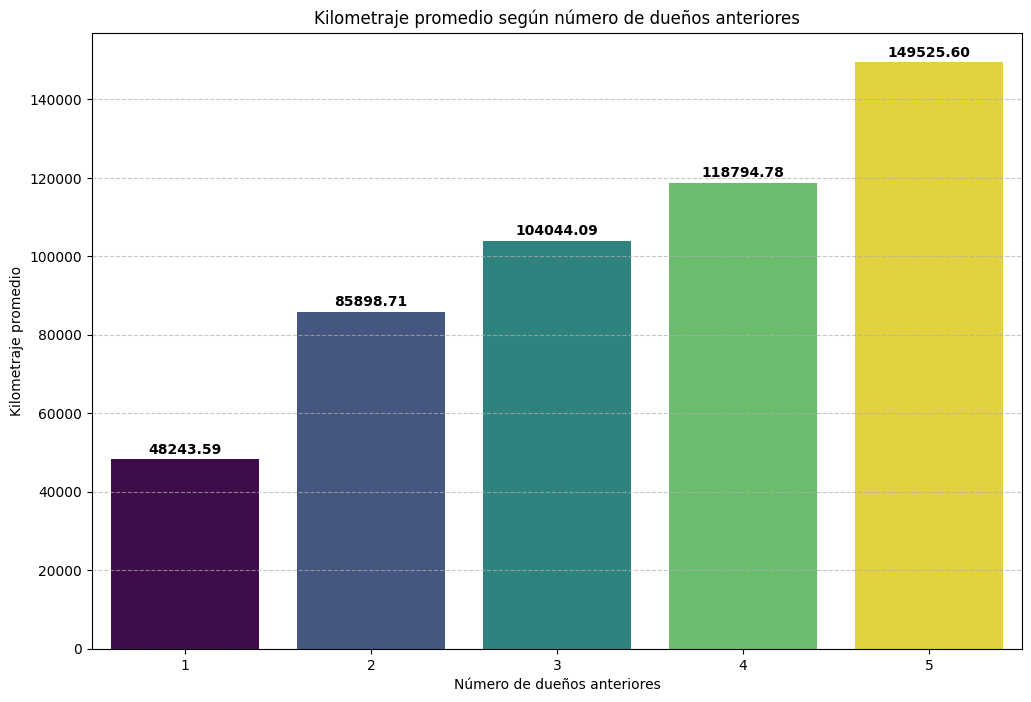

In [24]:
kilometraje_promedio = df_vehicle_price.groupby('owner_count')['mileage'].mean().reset_index()
kilometraje_promedio = kilometraje_promedio.sort_values(by='mileage',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='owner_count', y='mileage', data=kilometraje_promedio, hue='owner_count', palette='viridis', legend=False)

# Añadir los valores encima de cada barra
for index, row in kilometraje_promedio.iterrows():
    plt.text(
        x=index, 
        y=row['mileage'] + 600,   # pequeño margen para que no se solape con la barra
        s=f"{row['mileage']:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.title('Kilometraje promedio según número de dueños anteriores')
plt.xlabel('Número de dueños anteriores')
plt.ylabel('Kilometraje promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Cuantos más dueños ha tenido un vehículo, mayor es el kilometraje promedio acumulado.

¿Cómo se diferencia el kilometraje de los vehículos vendidos por un Concesionario (seller_type) en función del número de dueños que han tenido?